<h2 align=center> Facial Expression Recognition using Deep Learning</h2>

### Task 1: Import Libraries

In [ ]:
!pip install utils
!pip install livelossplot

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.13.0


In [2]:
#Data loading
train_dir = 'train/'
test_dir = 'validation/'

### Task 2: Data Processing (Data Analysis)

In [3]:
train_names =[]
train_names =[f for f in sorted(os.listdir(train_dir))]
print(len(train_names))

7


In [4]:
test_names =[]
test_names =[f for f in sorted(os.listdir(test_dir))]
print(len(test_names))

7


In [5]:
#Training Data
category_dict = {}
images_per_category_dict = {}
category_images_path_dict = {}

total_images = 0

for i in range(len(train_names)):
    folder_path = train_dir + '/' + str(train_names[i])
    category_dict[i] = train_names[i]

    image_names = [img for img in sorted(os.listdir(folder_path))]

    images_per_category_dict[i] = len(image_names)
    category_images_path_dict[i] = image_names

    print('%s: %d' %(train_names[i], images_per_category_dict[i]))
    total_images += images_per_category_dict[i]

print('Total images in training data: %d' %(total_images))

angry: 3993
disgust: 5232
fear: 4103
happy: 4919
neutral: 4982
sad: 4938
surprise: 3205
Total images in training data: 31372


In [7]:
#Testing Data
category_dict = {}
images_per_category_dict = {}
category_images_path_dict = {}

total_images = 0

for i in range(len(test_names)):
    folder_path = test_dir + '/' + str(test_names[i])
    category_dict[i] = test_names[i]

    image_names = [img for img in sorted(os.listdir(folder_path))]

    images_per_category_dict[i] = len(image_names)
    category_images_path_dict[i] = image_names

    print('%s: %d' %(train_names[i], images_per_category_dict[i]))
    total_images += images_per_category_dict[i]

print('Total images in testing data: %d' %(total_images))

angry: 960
disgust: 1332
fear: 1018
happy: 1825
neutral: 1216
sad: 1139
surprise: 1594
Total images in testing data: 9084


### Task 3: Generate Training and Validation Batches

In [8]:
img_size = 48
batch_size = 64

#Training Batch
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255)
train_generator = datagen_train.flow_from_directory(train_dir,
                                                     target_size=(img_size,img_size),
                                                     color_mode='grayscale',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True)

#Validation Batch
datagen_validation = ImageDataGenerator(
    width_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255)
validation_generator = datagen_validation.flow_from_directory(test_dir,
                                                     target_size=(img_size,img_size),
                                                     color_mode='grayscale',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True)

Found 31372 images belonging to 7 classes.
Found 9084 images belonging to 7 classes.


### Task 4: Create CNN Model

In [9]:
model=Sequential()

#1 - conv
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2 - conv layer
model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3 - conv layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4 - conv layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### Task 6: Train and Evaluate Model

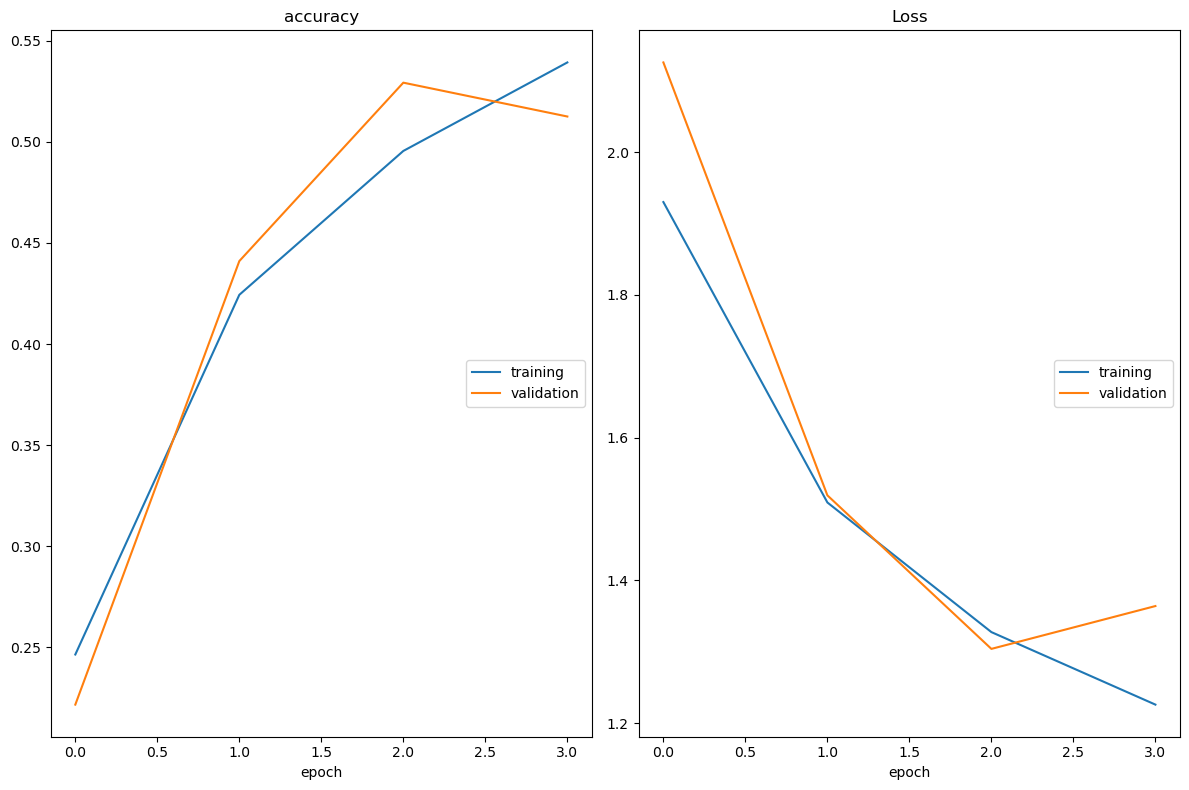

accuracy
	training         	 (min:    0.247, max:    0.539, cur:    0.539)
	validation       	 (min:    0.222, max:    0.529, cur:    0.513)
Loss
	training         	 (min:    1.226, max:    1.930, cur:    1.226)
	validation       	 (min:    1.304, max:    2.126, cur:    1.364)

Epoch 4: saving model to model_weights.h5
490/490 [==============================] - 489s 997ms/step - loss: 1.2260 - accuracy: 0.5393 - val_loss: 1.3641 - val_accuracy: 0.5125 - lr: 0.0010
Epoch 5/50
203/490 [===========>..................] - ETA: 4:35 - loss: 1.1638 - accuracy: 0.5624

UnknownError: Graph execution error:

FileNotFoundError: [Errno 2] No such file or directory: 'train/neutral\\33437.jpg'
Traceback (most recent call last):

  File "C:\Users\Akshat Mittal\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 268, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "C:\Users\Akshat Mittal\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Akshat Mittal\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Akshat Mittal\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\data_adapter.py", line 917, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\Akshat Mittal\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\data_adapter.py", line 1064, in generator_fn
    yield x[i]
          ~^^^

  File "C:\Users\Akshat Mittal\AppData\Roaming\Python\Python311\site-packages\keras\src\preprocessing\image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Akshat Mittal\AppData\Roaming\Python\Python311\site-packages\keras\src\preprocessing\image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Akshat Mittal\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\image_utils.py", line 422, in load_img
    with open(path, "rb") as f:
         ^^^^^^^^^^^^^^^^

FileNotFoundError: [Errno 2] No such file or directory: 'train/neutral\\33437.jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_4048]

In [13]:
epochs = 50
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.0000, model='auto')

callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

### Task 7: Represent Model as JSON String

In [ ]:
model_json = model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)

model.save("Base_Model_1.h5")

In [1]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
img_size = 48
batch_size = 64

#Training Batch
datagen_train = ImageDataGenerator(width_shift_range=0.1,
                                  horizontal_flip=True,
                                  rescale=1./255,
                                  rotation_range = 15,
                                  height_shift_range = 0.1,
                                  shear_range = 0.1,
                                  zoom_range = 0.1,
                                  fill_mode = "nearest")
train_generator = datagen_train.flow_from_directory(train_dir,
                                                     target_size=(img_size,img_size),
                                                     color_mode='grayscale',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True)

#Validation Batch
datagen_validation = ImageDataGenerator(width_shift_range=0.1,
                                        horizontal_flip=True,
                                        rescale=1./255,
                                        rotation_range = 15,
                                        height_shift_range = 0.1,
                                        shear_range = 0.1,
                                        zoom_range = 0.1,
                                        fill_mode = "nearest")
validation_generator = datagen_validation.flow_from_directory(test_dir,
                                                     target_size=(img_size,img_size),
                                                     color_mode='grayscale',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True)